<a href="https://colab.research.google.com/github/byebhai8/ISSS621-Group8/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ISSS621 Data Science in Business Group Project -Group 8

### H&M Recommender System for Customers

### Import Python Libraries

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import itertools

### Load and data cleaning for articles dataset 

In [2]:
# Load articles dataset
articles = pd.read_csv("articles.csv",encoding="ISO-8859-1")

# Find missing values and replace missing values if necessary
print(articles.isna().sum()) 
# There is no missing values except for detail desc, since detail desc field is not used for analysis, we will remove in on the next codes.
print("")

# Check duplicated row
duplicate = articles[articles.duplicated()]
print("Duplicate:",duplicate)
# There is no duplicate rows with same values for all fields
print("")

# Check how many fields in the dataframe and the field header names
print(articles.columns)
print("")

#Count the unique column in articles to determine which columnd to be used as feature of articles
for col in articles:
    print(col, ":", articles[col].nunique())
print("")
    
# Remove unneccessary field 
articles.drop(columns=['product_code', 'product_type_no','product_type_name', 
        'graphical_appearance_no', 'colour_group_code', 
        'perceived_colour_value_id', 'perceived_colour_value_name',
        'perceived_colour_master_id', 'perceived_colour_master_name',
        'department_no', 'department_name', 'index_code', 'index_name',
        'index_group_no', 'section_no', 'section_name',
       'garment_group_no', 'detail_desc'], inplace=True, errors='ignore')

# Format the article_id to str
articles['article_id'] = articles['article_id'].apply(str)

# Final checks on the useful field
print(articles.columns)
print(articles.shape)

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Duplicate: Empty DataFrame
Columns: [article_id, product_code, prod_name, product_type

### Explanatory Analysis on article dataset

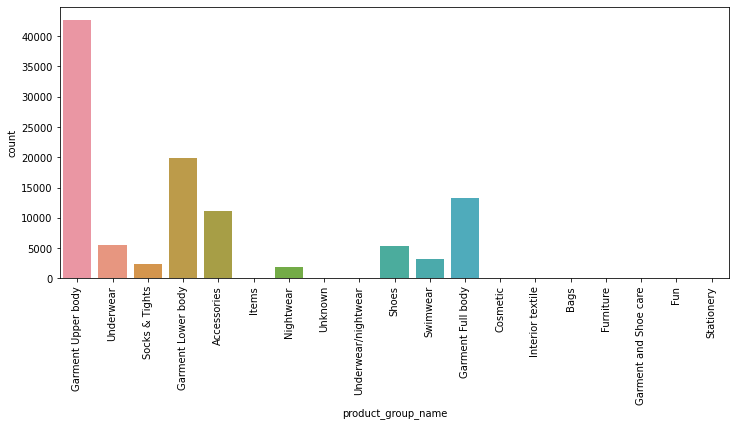

In [3]:
# Visualize the distribution of product_group_name
plt.figure(figsize=(12,5))
sns.countplot(x='product_group_name', data=articles)
plt.xticks(rotation=90)
plt.show()

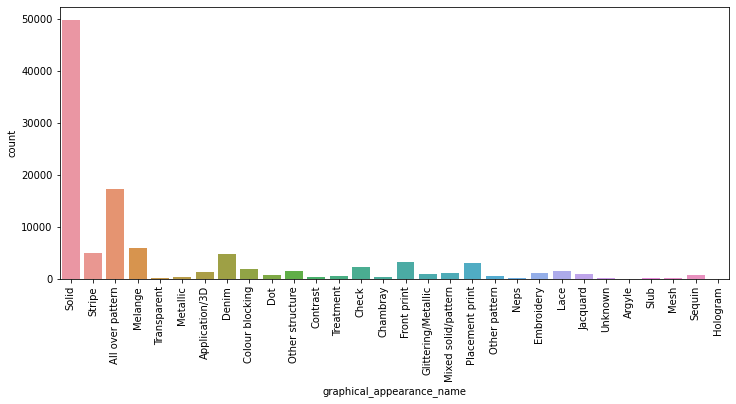

In [4]:
# Visualize the distribution of graphical_appearance_name
plt.figure(figsize=(12,5))
sns.countplot(x='graphical_appearance_name', data=articles)
plt.xticks(rotation=90)
plt.show()

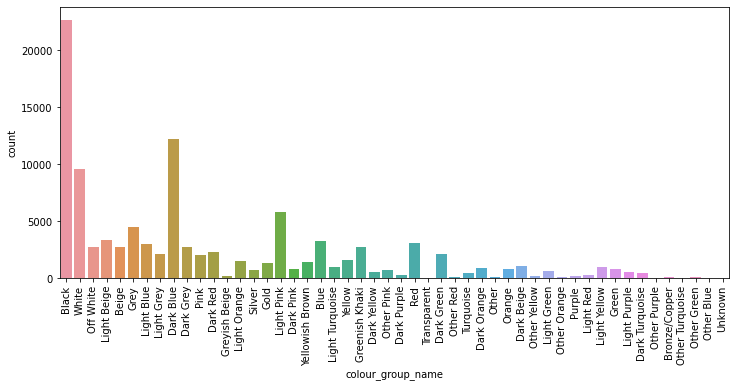

In [5]:
# Visualize the distribution of colour_group_name
plt.figure(figsize=(12,5))
sns.countplot(x='colour_group_name', data=articles)
plt.xticks(rotation=90)
plt.show()

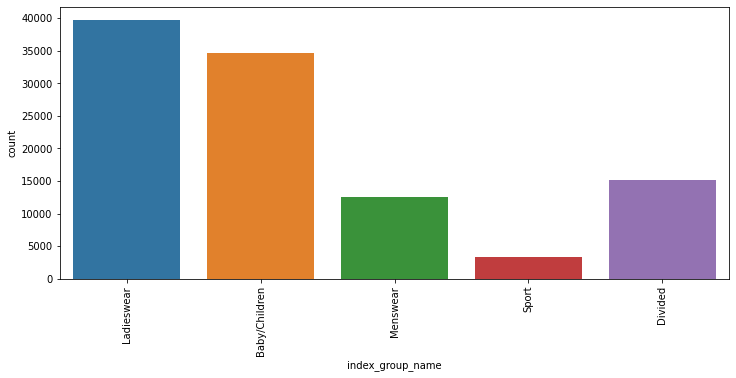

In [6]:
# Visualize the distribution of index_group_name
plt.figure(figsize=(12,5))
sns.countplot(x='index_group_name', data=articles)
plt.xticks(rotation=90)
plt.show()

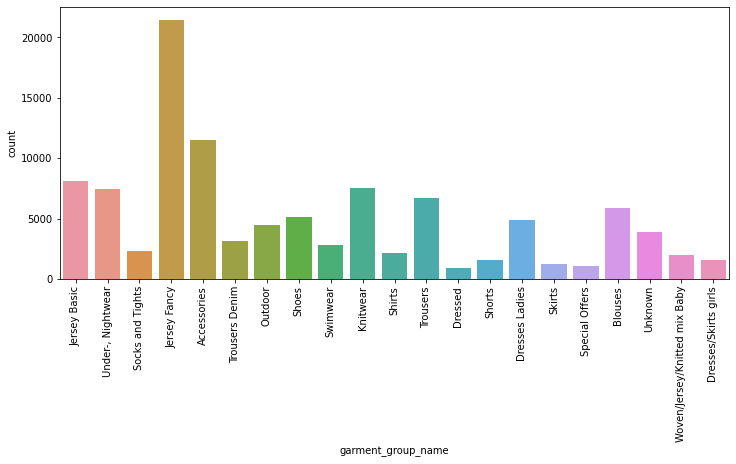

In [7]:
# Visualize the distribution of garment_group_name
plt.figure(figsize=(12,5))
sns.countplot(x='garment_group_name', data=articles)
plt.xticks(rotation=90)
plt.show()

### Load and data cleaning on customers dataset

In [8]:
# Load customers dataset
customers = pd.read_csv("customers.csv",encoding="ISO-8859-1")

# Find missing values and replace missing values if necessary
print(customers.isna().sum())
print("")

# Check duplicated row
duplicate_customers = customers[customers.duplicated()]
print("Duplicate:",duplicate_customers)
print("")

# Remove unneccessary field 
customers.drop(columns=['FN', 'Active','postal_code'], inplace=True, errors='ignore')
print(customers.columns)
print("")

#Process club_member_status column
# Replace nan with "NON-MEBER"
customers["club_member_status"].fillna("NON-MEMBER", inplace=True)

# Categorized club_member_status into 0,1,2,3 for graph plotting 
customers.loc[customers['club_member_status'] == 'NON-MEMBER', 'club_member_status_group'] = 0
customers.loc[customers['club_member_status'] == 'ACTIVE', 'club_member_status_group'] = 1
customers.loc[customers['club_member_status'] == 'PRE-CREATE', 'club_member_status_group'] = 2
customers.loc[customers['club_member_status'] == 'LEFT CLUB', 'club_member_status_group'] = 3

#remove the decimal point by converting the category to integers
customers["club_member_status_group"] = customers["club_member_status_group"].astype(int)
print(customers["club_member_status_group"].unique())
print("")

# Process fashion_news_frequency column
# Replace nan, NONE and none with NON-SUBSCRIBE

customers["fashion_news_frequency"].fillna("NOT-SUBSCRIBE", inplace=True)
customers["fashion_news_frequency"].replace("NONE", "NOT-SUBSCRIBE", inplace=True)
customers["fashion_news_frequency"].replace("None", "NOT-SUBSCRIBE", inplace=True)
customers["fashion_news_frequency"].unique()

# Categorized fashion_news_frequency 
customers.loc[customers['fashion_news_frequency'] == 'NOT-SUBSCRIBE', 'fashion_news_frequency_group'] = 0
customers.loc[customers['fashion_news_frequency'] == 'Regularly', 'fashion_news_frequency_group'] = 1
customers.loc[customers['fashion_news_frequency'] == 'Monthly', 'fashion_news_frequency_group'] = 2

#remove the decimal point by converting the category to integers
customers["fashion_news_frequency_group"] = customers["fashion_news_frequency_group"].astype(int)
#check the updated column categories
print(customers["fashion_news_frequency_group"].unique())
print("")

# Categorized age to age_group_label (0: No data, 1: Childen & Youth, 2: Adults, 3: Elderly)
customers.loc[customers['age']<=24, 'age_group'] = "A"
customers.loc[(customers['age']<=65) & (customers['age']>24), 'age_group'] = "B"
customers.loc[customers['age']>65, 'age_group'] = "C"
customers["age_group"].fillna('Z', inplace=True)

print(customers["age_group"].unique())
print("")

#check the final cleaned "customers" dataset
print(customers.columns)
print(customers.shape)

#customers_features = customers[["customer_id", "club_member_status_group","fashion_news_frequency_group","age_group"]]

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

Duplicate: Empty DataFrame
Columns: [customer_id, FN, Active, club_member_status, fashion_news_frequency, age, postal_code]
Index: []

Index(['customer_id', 'club_member_status', 'fashion_news_frequency', 'age'], dtype='object')

[1 0 2 3]

[0 1 2]

['B' 'A' 'Z' 'C']

Index(['customer_id', 'club_member_status', 'fashion_news_frequency', 'age',
       'club_member_status_group', 'fashion_news_frequency_group',
       'age_group'],
      dtype='object')
(1371980, 7)


In [9]:
#check the final cleaned "customers" dataset
print(customers.head(5))

                                         customer_id club_member_status  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...             ACTIVE   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...             ACTIVE   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...             ACTIVE   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...             ACTIVE   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...             ACTIVE   

  fashion_news_frequency   age  club_member_status_group  \
0          NOT-SUBSCRIBE  49.0                         1   
1          NOT-SUBSCRIBE  25.0                         1   
2          NOT-SUBSCRIBE  24.0                         1   
3          NOT-SUBSCRIBE  54.0                         1   
4              Regularly  52.0                         1   

   fashion_news_frequency_group age_group  
0                             0         B  
1                             0         B  
2                             0         A  
3           

### Explanatory Analysis on customers dataset

In [10]:
# Set the display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Check the distribution of fashion_news_frequency
print(customers['fashion_news_frequency'].value_counts())


NOT-SUBSCRIBE    893722
Regularly        477416
Monthly             842
Name: fashion_news_frequency, dtype: int64


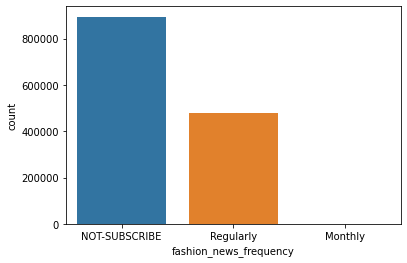

In [11]:
# Visualize the distribution of fashion_news_frequency
sns.countplot(x='fashion_news_frequency', data=customers)
plt.show()

In [12]:
# Check the distribution of club_member_status
print(customers['club_member_status'].value_counts())

ACTIVE        1272491
PRE-CREATE      92960
NON-MEMBER       6062
LEFT CLUB         467
Name: club_member_status, dtype: int64


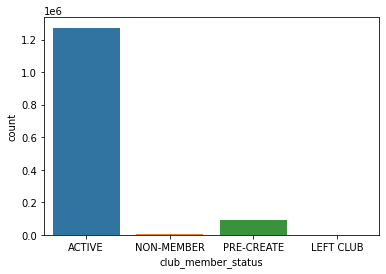

In [13]:
# Visualize the distribution of fashion_news_frequency
sns.countplot(x='club_member_status', data=customers)
plt.show()

In [14]:
# Check the distribution of club_member_status
print(customers['age'].value_counts())

21.00    67530
24.00    56124
20.00    55196
25.00    54989
23.00    54867
         ...  
98.00        7
97.00        4
93.00        4
96.00        3
94.00        3
Name: age, Length: 84, dtype: int64


In [15]:
# As "age" category is difficult to see at individual age value
# Count the number of customers in each age bin and plot group
age_bins = pd.cut(customers['age'], bins=5)
age_counts = age_bins.value_counts()

# Print the results
print(age_counts)

(15.917, 32.6]    703884
(32.6, 49.2]      334243
(49.2, 65.8]      280425
(65.8, 82.4]       36971
(82.4, 99.0]         596
Name: age, dtype: int64


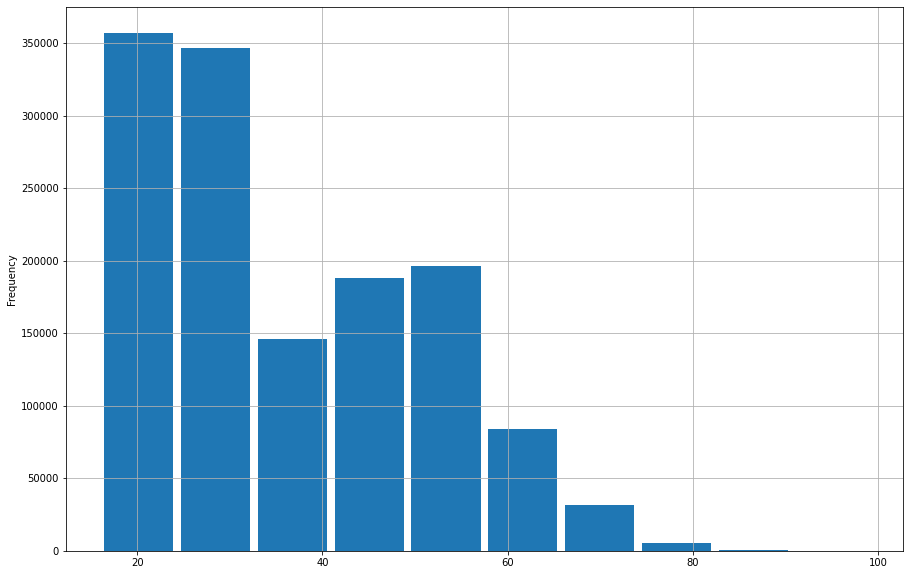

In [16]:
# Visualize the distribution of numerical variables
customers['age'].plot.hist(grid = True, bins=10, figsize=(15,10),rwidth = 0.9)
plt.show()

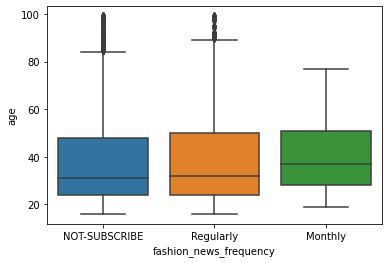

In [17]:
# Visualize the relationship between fashion_news_frequency and age
sns.boxplot(x='fashion_news_frequency', y='age', data=customers)
plt.show()

<AxesSubplot:xlabel='club_member_status', ylabel='age'>

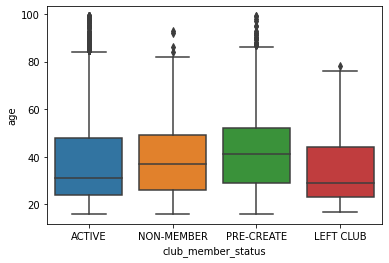

In [18]:
# Visualize the relationship between club_member_status and age
sns.boxplot(x='club_member_status', y='age', data=customers)

In [19]:
# Check the distribution of numerical variables
print(customers.describe())

             age  club_member_status_group  fashion_news_frequency_group
count 1356119.00                1371980.00                    1371980.00
mean       36.39                      1.06                          0.35
std        14.31                      0.26                          0.48
min        16.00                      0.00                          0.00
25%        24.00                      1.00                          0.00
50%        32.00                      1.00                          0.00
75%        49.00                      1.00                          1.00
max        99.00                      3.00                          2.00


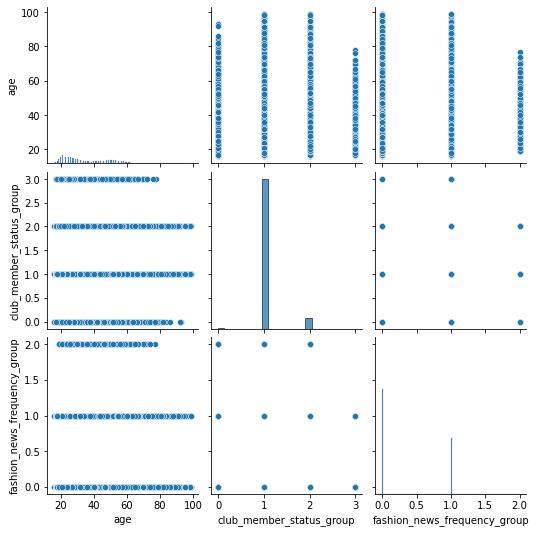

In [20]:
# Visualize the relationship between variables
sns.pairplot(customers)
plt.show()

### Load and data cleaning for transactions dataset

In [21]:
# Load trasactions_train dataset
transactions_train = pd.read_csv("transactions_train.csv",encoding="ISO-8859-1")

# Preprocessing for transaction_train dataset
# Find missing values and replace missing values if necessary
transactions_train.isna().sum()

# Check duplicated row
# Assumption: Duplicated row means double entry (customer buy the same articles on the same day) 
duplicate_transactions = transactions_train[transactions_train.duplicated()]
duplicate_transactions

# Remove duplicated rows
transactions_train.drop_duplicates(inplace=True)

# Format t_dat field to datetime type
transactions_train['t_dat'] =  pd.to_datetime(transactions_train['t_dat'], format='%Y-%m-%d')

# Sales Channel ID 1 refers to online purchases and Sales Channel ID 2 refers to in-store purchase
# Since our recommendation system only works for online purchases, the rows with channel id 2 is removed.
transactions_train = transactions_train[transactions_train.sales_channel_id == 1]

# Remove sales_channel_id field
transactions_train.drop(columns=['sales_channel_id'], inplace=True, errors='ignore')

# Format the article_id to str
transactions_train['article_id'] = transactions_train['article_id'].apply(str)

print(transactions_train.columns)
print(transactions_train.shape)

Index(['t_dat', 'customer_id', 'article_id', 'price'], dtype='object')
(9126613, 4)


### Explanatory Analysis on transaction dataset

Text(0, 0.5, 'Total Transactions')

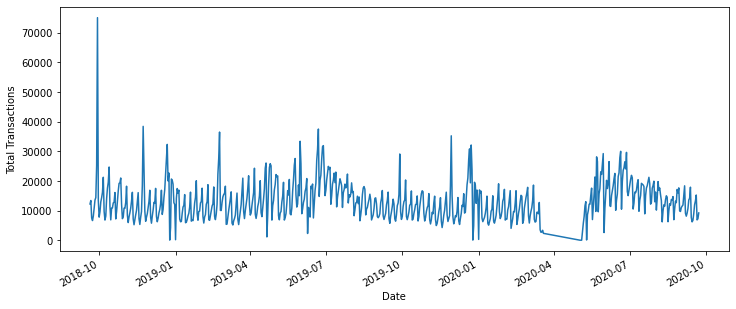

In [22]:
# Plot total transactions over time 
plt.figure(figsize=(12,5))
ax = transactions_train.groupby('t_dat').size()
ax.plot()
plt.xlabel("Date")
plt.ylabel("Total Transactions")

Text(0, 0.5, 'Customer ID')

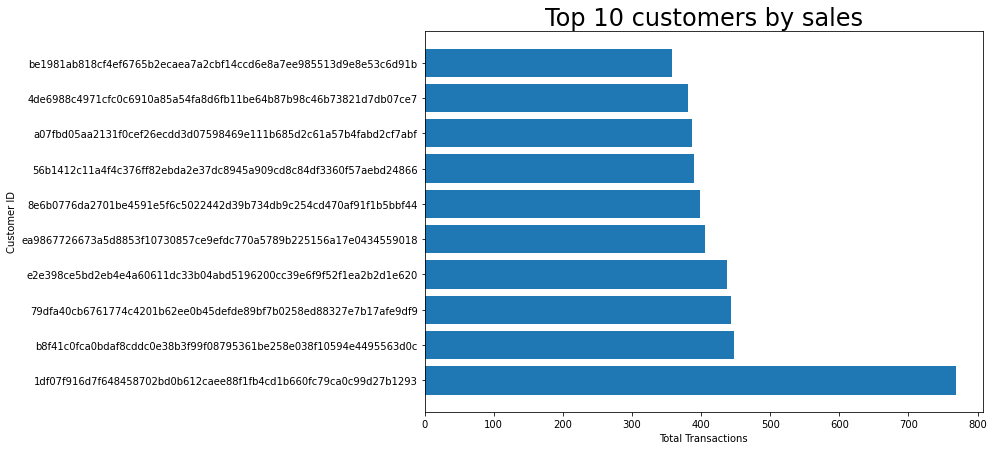

In [23]:
# Top 10 customer will the most total transactions over 2 years
purchase_counts = transactions_train[['customer_id','article_id']].groupby(['customer_id'], as_index=False).count().sort_values(by= ["article_id"], ascending= False)

fig = plt.figure(figsize =(10, 7))
x=purchase_counts["article_id"].head(10)
y=purchase_counts["customer_id"].head(10)
 
# Horizontal Bar Plot
plt.barh(y,x)
plt.title("Top 10 customers by sales", fontsize= 24)
plt.xlabel("Total Transactions")
plt.ylabel("Customer ID")

Text(0, 0.5, 'Article ID')

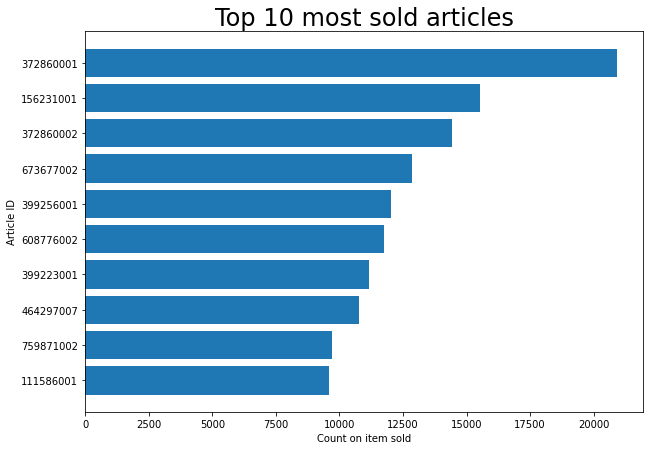

In [24]:
# Top 10 most sold articles over 2 years
items_sold = transactions_train[['article_id','customer_id']].groupby(['article_id'], as_index=False).count().sort_values(by= ["customer_id"], ascending= True)

fig = plt.figure(figsize =(10, 7))
x=items_sold["customer_id"].tail(10)
y=items_sold["article_id"].apply(str).tail(10)
 
# Horizontal Bar Plot
plt.barh(y,x)
plt.title("Top 10 most sold articles", fontsize= 24)
plt.xlabel("Count on item sold")
plt.ylabel("Article ID")

In [25]:
# transactions_train.columns

In [26]:
# # This visualization can only be run before sales_channel_id column is removed
# transactions_train = pd.read_csv("transactions_train.csv",encoding="ISO-8859-1")
# # Visualize the distribution of sales_channel_id
# plt.figure(figsize=(12,5))
# sns.countplot(x='sales_channel_id', data=transactions_train)
# plt.xticks(rotation=90)
# plt.show()

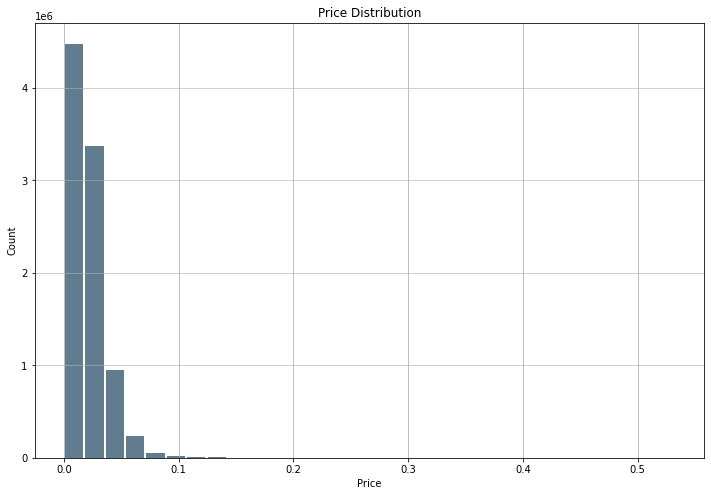

In [27]:
# Visualization of price distribution
plt.figure(figsize=(12,8))
transactions_train["price"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)

In [28]:
# # This visualization can only be run before sales_channel_id column is removed
# transactions_train = pd.read_csv("transactions_train.csv",encoding="ISO-8859-1")
# # Visualize the relationship between price and sales_channel_id
# plt.figure(figsize=(5,12))
# sns.boxplot(x='sales_channel_id', y='price', data=transactions_train)
# plt.show()

### Merge transactions and customers dataset

In [29]:
transactions_customers = pd.merge(transactions_train, customers, on='customer_id')
print(transactions_customers.columns)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'club_member_status',
       'fashion_news_frequency', 'age', 'club_member_status_group',
       'fashion_news_frequency_group', 'age_group'],
      dtype='object')


In [30]:
# remove the columns that are not used for processing
# transactions_customers.drop(columns=['article_id', 'sales_channel_id','club_member_status', 
#                                      'fashion_news_frequency','age'], inplace=True, errors="ignore")
#print(transactions_customers.head(5))


### Merge transactions and articles dataset

In [31]:
transactions_articles = pd.merge(transactions_train, articles, on='article_id')
print(transactions_articles.columns)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'prod_name',
       'product_group_name', 'graphical_appearance_name', 'colour_group_name',
       'index_group_name', 'garment_group_name'],
      dtype='object')


Text(0, 0.5, 'Article ID')

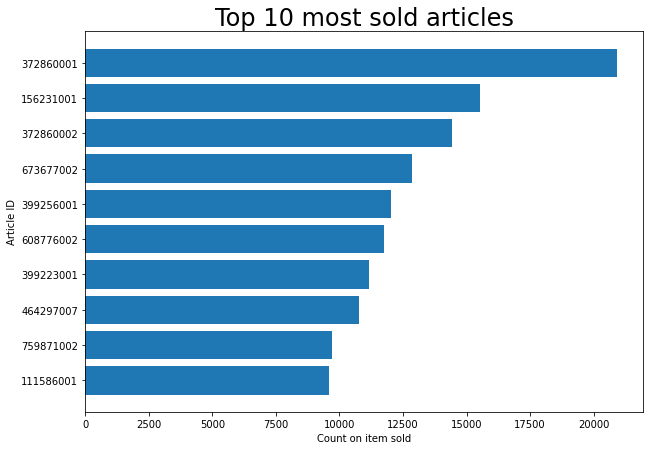

In [32]:
# Top 10 most sold articles over 2 years
items_sold = transactions_articles[['article_id','customer_id']].groupby(['article_id'], as_index=False).count().sort_values(by= ["customer_id"], ascending= True)

fig = plt.figure(figsize =(10, 7))
x=items_sold["customer_id"].tail(10)
y=items_sold["article_id"].apply(str).tail(10)
 
# Horizontal Bar Plot
plt.barh(y,x)
plt.title("Top 10 most sold articles", fontsize= 24)
plt.xlabel("Count on item sold")
plt.ylabel("Article ID")

### RFM

In [33]:
# Find the latest date in the dataset
snapshot_date = transactions_customers['t_dat'].max() + pd.DateOffset(days=1)

In [34]:
# Find the latest date in the dataset
snapshot_date = transactions_customers['t_dat'].max() + pd.DateOffset(days=1)

# Calculate Recency, Frequency, and Monetary
rfm = transactions_customers.groupby('customer_id').agg({
    't_dat': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'price': 'sum'
}).rename(columns={'t_dat': 'Recency',
                   'customer_id': 'Frequency',
                   'price': 'Monetary'})

# Reset the index
rfm = rfm.reset_index()

# Print the result
#print(rfm.head())

# Define into 4 quantiles
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

# Assign labels for Recency
def r_score(x, p, quantiles):
    if x <= quantiles[p][0.25]:
        return 4
    elif x <= quantiles[p][0.5]:
        return 3
    elif x <= quantiles[p][0.75]:
        return 2
    else:
        return 1

# Assign labels for Frequency, and Monetary
def fm_score(x, p, quantiles):
    if x <= quantiles[p][0.25]:
        return 1
    elif x <= quantiles[p][0.5]:
        return 2
    elif x <= quantiles[p][0.75]:
        return 3
    else:
        return 4
    
    
# Calculate RFM scores
rfm['R'] = rfm['Recency'].apply(r_score, args=('Recency', quantiles))
rfm['F'] = rfm['Frequency'].apply(fm_score, args=('Frequency', quantiles))
rfm['M'] = rfm['Monetary'].apply(fm_score, args=('Monetary', quantiles))

# Combine RFM scores
rfm['RFM_Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']


# Define the customer groups
def customer_group(score):
    if score <= 6:
        return 'Low Spender'
    elif score <= 9:
        return 'Promising'
    elif score <= 11:
        return 'High Spender'
    else:
        return 'Champion'

# Assign customer groups
rfm['Customer_Group'] = rfm['RFM_Score'].apply(customer_group)

# Print the result
# print(rfm.head())

# # Sort by Recency value and get the top 10 customers
# top_10_customers_R = rfm.sort_values(by='Recency', ascending=False).head(10)

# # Print the result
# print(top_10_customers_R)

# Sort by Frequency value and get the top 10 customers
top_10_customers_F = rfm.sort_values(by='Frequency', ascending=False).head(10)

# Print the result
print(top_10_customers_F)


# # Sort by Monetary value and get the top 10 customers
# top_10_customers_M = rfm.sort_values(by='Monetary', ascending=False).head(10)

# # Print the result
# print(top_10_customers_M)



                                              customer_id  Recency  Frequency  \
86329   1df07f916d7f648458702bd0b612caee88f1fb4cd1b660...       11        769   
533140  b8f41c0fca0bdaf8cddc0e38b3f99f08795361be258e03...       48        447   
351040  79dfa40cb6761774c4201b62ee0b45defde89bf7b0258e...        1        443   
653120  e2e398ce5bd2eb4e4a60611dc33b04abd5196200cc39e6...        7        438   
675110  ea9867726673a5d8853f10730857ce9efdc770a5789b22...       24        405   
410157  8e6b0776da2701be4591e5f6c5022442d39b734db9c254...       55        399   
249555  56b1412c11a4f4c376ff82ebda2e37dc8945a909cd8c84...        4        389   
462445  a07fbd05aa2131f0cef26ecdd3d07598469e111b685d2c...       13        387   
224200  4de6988c4971cfc0c6910a85a54fa8d6fb11be64b87b98...        3        381   
547763  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...       11        358   

        Monetary  R  F  M RFM_Segment  RFM_Score Customer_Group  
86329      25.01  4  4  4         444     

In [35]:
# Update customer dataset with Customer_Group
customers_upd = pd.merge(customers, 
                     rfm[["customer_id","Customer_Group"]], 
                     on ='customer_id', 
                     how ='left')

# Customer without transactions will be segmented into different group (i.e. "I")
customers_upd["Customer_Group"].fillna("No Transaction", inplace=True)

In [36]:
# Update transaction_customer dataset with Customer_Group
trans_cust_upd = pd.merge(transactions_customers, 
                     rfm[["customer_id","Customer_Group"]], 
                     on ='customer_id', 
                     how ='left')

# Customer without transactions will be segmented into different group (i.e. "I")
trans_cust_upd["Customer_Group"].fillna("No Transaction", inplace=True)


In [37]:
# Update transaction_customer dataset with Customer_Group
trans_art_upd =  pd.merge(transactions_articles, 
                     rfm[["customer_id","Customer_Group"]], 
                     on ='customer_id', 
                     how ='left')
# Customer without transactions will be segmented into different group (i.e. "I")
trans_cust_upd["Customer_Group"].fillna("No Transaction", inplace=True)

In [38]:
customers_upd[customers_upd["Customer_Group"]=="No Transaction"]

,customer_id,club_member_status,fashion_news_frequency,age,club_member_status_group,fashion_news_frequency_group,age_group,Customer_Group
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NOT-SUBSCRIBE,24.00,1,0,A,No Transaction
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NOT-SUBSCRIBE,54.00,1,0,B,No Transaction
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NON-MEMBER,NOT-SUBSCRIBE,NaN,0,0,Z,No Transaction
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,ACTIVE,NOT-SUBSCRIBE,20.00,1,0,A,No Transaction
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,ACTIVE,NOT-SUBSCRIBE,29.00,1,0,B,No Transaction
...,...,...,...,...,...,...,...,...
1371967,ffff2f5a160e334d722d2f2c36be9907f6d097a141e49b...,ACTIVE,NOT-SUBSCRIBE,40.00,1,0,B,No Transaction
1371968,ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed...,ACTIVE,NOT-SUBSCRIBE,40.00,1,0,B,No Transaction
1371970,ffff64f7850d4268016db8db3d48bf5433db2a926ba71b...,ACTIVE,Regularly,32.00,1,1,B,No Transaction
1371972,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,ACTIVE,NOT-SUBSCRIBE,52.00,1,0,B,No Transaction


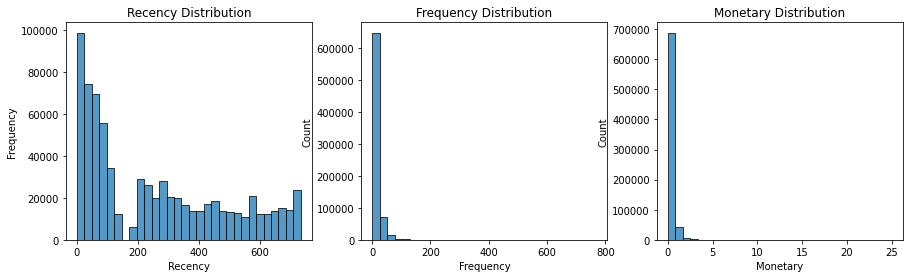

In [39]:
# Visualization
# Distribution plots for Recency, Frequency, and Monetary
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=False, bins=30)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=False, bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=False, bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.show()

Low Spender     309598
Promising       208926
High Spender    136772
Champion         81822
Name: Customer_Group, dtype: int64


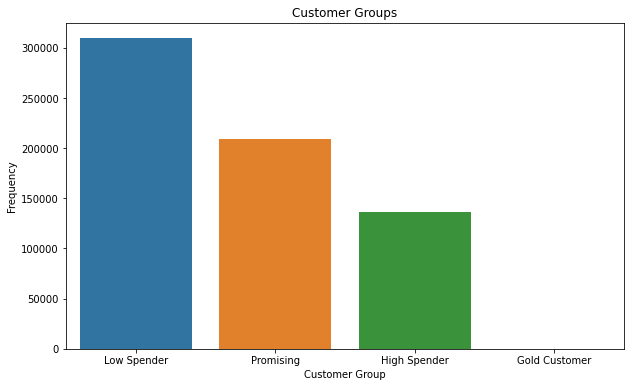

In [40]:
# Count the number of customers in each segment
customer_counts = rfm['Customer_Group'].value_counts()
print(customer_counts)

# Count plot for Customer_Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Group', data=rfm, order=['Low Spender', 'Promising', 'High Spender', 'Gold Customer'])
plt.title('Customer Groups')
plt.xlabel('Customer Group')
plt.ylabel('Frequency')
plt.show()

### Predictions 
- Association Rule Mining/Market Basket Analysis 
- Collaborative Analysis
- Customers Cluster -> recommend top 10 most popular on each cluster

### Market Basket Analysis

In [41]:
def encode_units(x):
    if x <= 0:
        return False
    else:
        return True
    
def market_basket (cust_group):
    trans_cust_upd1 =trans_cust_upd[["t_dat","customer_id","article_id","price","Customer_Group"]]
    A_seg = pd.merge(trans_cust_upd1[trans_cust_upd1.Customer_Group == cust_group], articles, on="article_id")
    basket_A = A_seg.groupby(['customer_id','product_group_name']).size().unstack().reset_index().fillna(0).set_index("customer_id")
    # Convert the transactional data into a one-hot encoded format

    # basket_sets = basket_A.applymap(encode_units)

    basket_sets_filter = basket_A.applymap(encode_units)
    # basket_sets_filter = basket_sets[(basket_sets>0).sum(axis=1)>=2]


    # Generate frequent itemsets using Apriori algorithm
    frequent_itemsets = apriori(basket_sets_filter, min_support=0.03, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
#     print(frequent_itemsets.head())

    # Generate association rules using the frequent itemsets (Higher lift: stronger associations)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

#     rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.4)]


    df = trans_art_upd[trans_art_upd["Customer_Group"]==cust_group]
    top_article =pd.DataFrame (df["product_group_name"].unique(), columns=["product_group_name"])
    lst=[]
    for j in df["product_group_name"].unique() :
        lst.append(df[df["product_group_name"]==j].article_id.mode()[0])
    top_article["top_article"] = lst
#     print(top_article)
    return rules, top_article




### Recommendation System

In [42]:
# Recommender System for first item 
def first_item():
    first_item_rec = x["antecedents"]

    antecedents=[]
    for i in first_item_rec[:11]:
        rec = list (i)
#         print(rec)
        for j in rec:
            antecedents.append(j)

#     ant_setlist =set(antecedents)
    
    ant_setlist = list(dict.fromkeys(antecedents))
    
    
    print("First Item Recommendation product group",ant_setlist)

    first_item_reco=[]
    for k in ant_setlist:
        if k in y["product_group_name"].unique():
            first_item_reco.append(y.loc[y["product_group_name"]==k, "top_article"].iloc[0])
    #         print(first_item_reco)
    print("First Item Recommendation (article id): ", first_item_reco)  
    return 

In [43]:
def second_item(item_combinations):
    list_of_combi=[]
    list_of_prod=[]
    
    
    for j in range(len(item_combinations)):
        item_in_cart = item_combinations[j]
        prod_in_cart=[]

        for item in item_in_cart:
            if item in articles["article_id"].unique():
                prod_in_cart.append(articles.loc[articles["article_id"]==item, "product_group_name"].iloc[0])
    #             print(prod_in_cart)
        prod_in_cart = list(dict.fromkeys(prod_in_cart))
#         print("Product in cart:",prod_in_cart)

        ante = x["antecedents"]
        second_item_rec = x["consequents"]

        antecedents=[]
        for i in ante:
            rec = list (i)
        #     print(rec)
            if sorted(rec)== sorted(prod_in_cart):
                cons_list = list(x.loc[x["antecedents"]==i, "consequents"].iloc[0])
#                 print("Next Item Recommendation product group:" ,cons_list)
                second_reco=[]
                for k in cons_list:
                    second_reco.append(y.loc[y["product_group_name"]==k, "top_article"].iloc[0])
#                 print("Next Item Recommendation (article_id):" , second_reco)
                break
        list_of_prod.append(cons_list)
        list_of_combi.append(second_reco)
    print("Product in cart:", list(dict.fromkeys(flatten(item_combinations))))
    print("Next Item Recommendation product group", list(dict.fromkeys(flatten(list_of_prod))))
    print("Next Item Recommendation (article_id)", list(dict.fromkeys(flatten(list_of_combi))))

In [44]:
# Recommender for the next item
def second_item(item_combinations):
    list_of_combi=[]
    list_of_prod=[]
    
    # If there is currently no item on cart
    if len(item_combinations)==0:
        print("Since there is nothing on the cart, will recommend based on first item recommender.")
        first_item()
    
    # If there is currently only 1 item in the cart
    elif len(item_combinations)==1:
        item_in_cart = item_combinations[0]
        prod_in_cart=[]
        for item in item_in_cart:
            if item in articles["article_id"].unique():
                prod_in_cart.append(articles.loc[articles["article_id"]==item, "product_group_name"].iloc[0])
            else:
                print("Article ID is not correct!")
                break
        if len(prod_in_cart)!= 0:
            prod_in_cart = list(dict.fromkeys(prod_in_cart))
            print("Product in cart:",prod_in_cart)
            ante = x["antecedents"]
            second_item_rec = x["consequents"]
            antecedents=[]
            for i in ante:
                rec = list (i)

                if sorted(rec)== sorted(prod_in_cart):
                    cons_list = list(x.loc[x["antecedents"]==i, "consequents"].iloc[0])
                    print("Next Item Recommendation product group:" ,cons_list)
                    second_reco=[]
                    for k in cons_list:
                        second_reco.append(y.loc[y["product_group_name"]==k, "top_article"].iloc[0])
                    print("Next Item Recommendation (article_id):" , second_reco)
                    break
    # If there is currently more than 1 item in the cart
    else:    
    
        for j in range(len(item_combinations)):
            item_in_cart = item_combinations[j]
            prod_in_cart=[]
            for item in item_in_cart:
                if item in articles["article_id"].unique():
                    prod_in_cart.append(articles.loc[articles["article_id"]==item, "product_group_name"].iloc[0])
            if len(prod_in_cart)!= 0:
                prod_in_cart = list(dict.fromkeys(prod_in_cart))
                ante = x["antecedents"]
                second_item_rec = x["consequents"]
                antecedents=[]
                for i in ante:
                    rec = list (i)
                    if sorted(rec)== sorted(prod_in_cart):
                        cons_list = list(x.loc[x["antecedents"]==i, "consequents"].iloc[0])
                        second_reco=[]
                        for k in cons_list:
                            second_reco.append(y.loc[y["product_group_name"]==k, "top_article"].iloc[0])
                        break
                list_of_prod.append(cons_list)
                list_of_combi.append(second_reco)
        if prod_in_cart==[]:
            print("Article ID are not correct!")
        else:
            print("Product in cart:", prod_in_cart)
            print("Next Item Recommendation product group", list(dict.fromkeys(flatten(list_of_prod))))
            print("Next Item Recommendation (article_id)", list(dict.fromkeys(flatten(list_of_combi))))

In [45]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [46]:
# Recommender System

# Insert Customer ID
cust_id = input("Customer ID: ")

if cust_id in customers_upd["customer_id"].unique():
    cust_group = customers_upd.loc[customers_upd["customer_id"]==cust_id, "Customer_Group"].iloc[0]
    print("Customer Group: ", cust_group)
    
    if cust_group == "No Transaction":
        print("Customer has never made a transacion before so there is no recommendation")
    else: 
        x, y = market_basket(cust_group)

        question= input("Is this the first item on the cart? (y/n)")
        if question=="y":
            first_item()
        elif question =="n":
            input_string = input("Input list of items separated by space:")
            item_in_cart = input_string.split()
            item_combinations = []
            for i in range(1, len(item_in_cart)+1):
                combinations = list(itertools.combinations(item_in_cart, i))
                item_combinations += [list(c) for c in combinations]
            second_item(item_combinations)
        else:
            print("Please input correct answer (y/n).")
else:
    print("Customer ID cannot be found")

Customer ID: 0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa
Customer Group:  Promising
Is this the first item on the cart? (y/n)y
First Item Recommendation product group ['Underwear', 'Nightwear', 'Garment Upper body', 'Accessories', 'Garment Lower body', 'Socks & Tights']
First Item Recommendation (article id):  ['464297007', '536139006', '673677002', '673396002', '399256001', '372860001']


For Demo

Customer ID: (Promising)
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa

Customer ID: (Champion)
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7

Customer ID: (No Transaction)
002eee4be23177391977b73936103b4251478fd521bed00fde2f33afc1127df0

Item in cart 2(items):
655265002 688873012 

Item in cart 3(items):
655265002 688873012 110065001	



### Market Basket Analyis Result

In [47]:
x

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Underwear),(Nightwear),0.37,0.07,0.04,0.10,1.45,0.01,1.03
1,(Nightwear),(Underwear),0.07,0.37,0.04,0.54,1.45,0.01,1.36
2,"(Underwear, Garment Upper body)",(Nightwear),0.34,0.07,0.03,0.10,1.44,0.01,1.03
3,(Nightwear),"(Underwear, Garment Upper body)",0.07,0.34,0.03,0.49,1.44,0.01,1.29
4,"(Nightwear, Garment Upper body)",(Underwear),0.06,0.37,0.03,0.53,1.42,0.01,1.33
...,...,...,...,...,...,...,...,...,...
429,"(Garment Full body, Garment Upper body)","(Socks & Tights, Garment Lower body)",0.37,0.19,0.07,0.19,1.00,0.00,1.00
430,"(Socks & Tights, Garment Full body, Underwear)",(Garment Upper body),0.04,0.93,0.04,0.94,1.00,0.00,1.01
431,(Garment Upper body),"(Socks & Tights, Garment Full body, Underwear)",0.93,0.04,0.04,0.04,1.00,0.00,1.00
432,(Garment Upper body),(Accessories),0.93,0.43,0.40,0.43,1.00,0.00,1.00


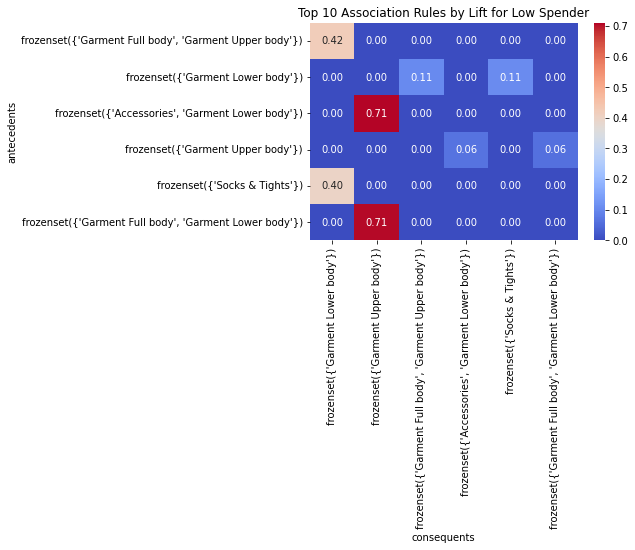

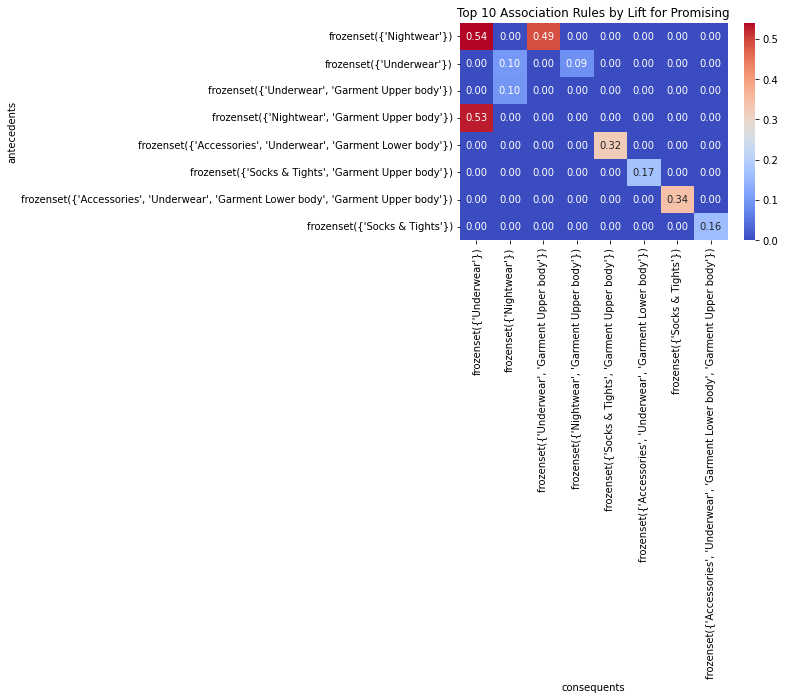

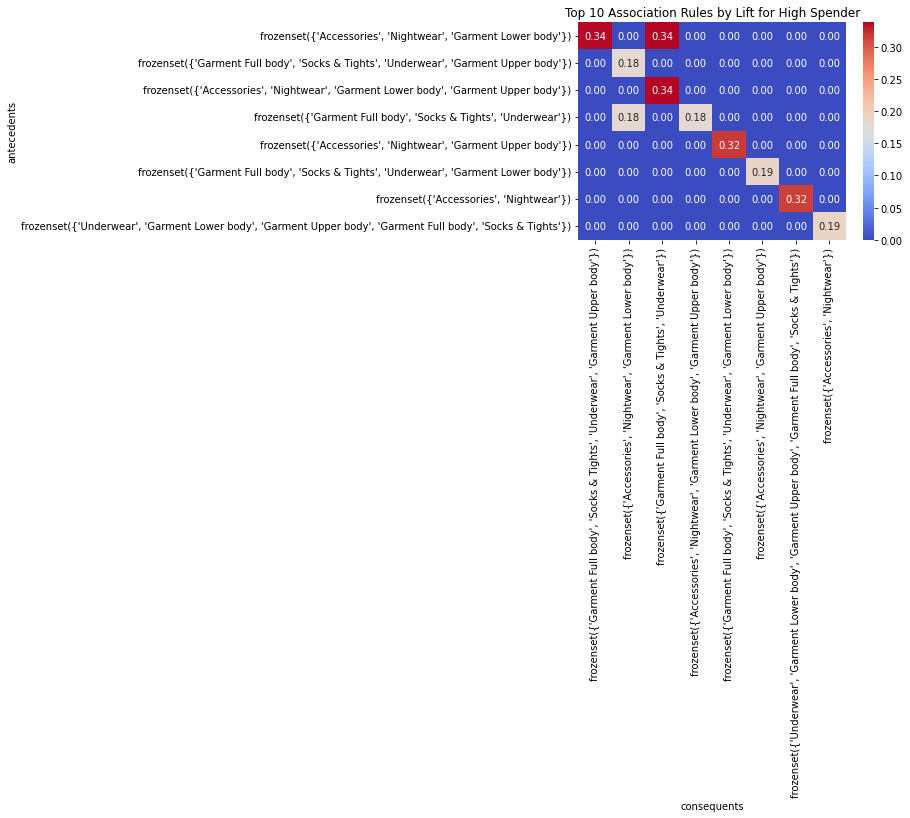

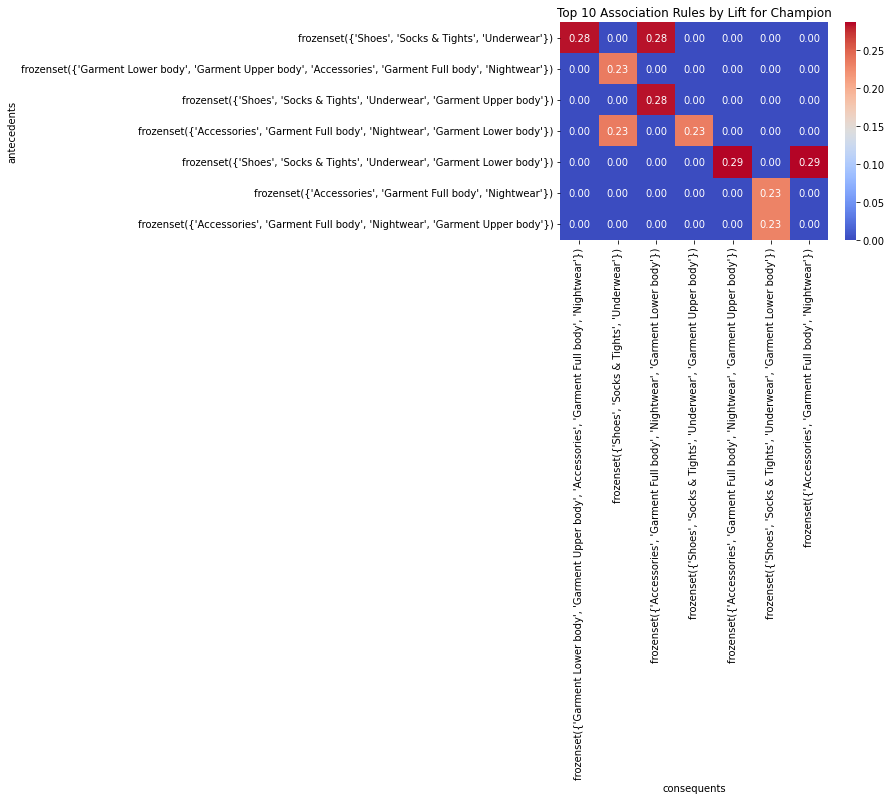

In [48]:
# Visualization


# Define a list of customer groups
customer_groups = ['Low Spender', 'Promising', 'High Spender', 'Champion']

# Loop through each customer group and generate a market basket analysis visualization
for group in customer_groups:
    # Get the frequent itemsets and association rules for the customer group
    rules, top_article = market_basket(group)

    # Sort the rules by lift and select the top 10
    top_rules = rules.sort_values(by=['lift', 'support','confidence'], ascending=False).head(10)

    # Create a pivot table that shows the frequency of co-occurrence of products
    basket_pivot = pd.pivot_table(top_rules, values='confidence', index=['antecedents'], columns=['consequents'], fill_value=0)

    # Create a heatmap of the pivot table
    sns.heatmap(basket_pivot, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Top 10 Association Rules by Lift for {group}')
    plt.show()